In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

In [2]:
testpath= "/content/drive/MyDrive/E-Waste Classification Dataset/test"
trainpath= "/content/drive/MyDrive/E-Waste Classification Dataset/train"
validpath = "/content/drive/MyDrive/E-Waste Classification Dataset/val"

In [3]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [4]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [5]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [6]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


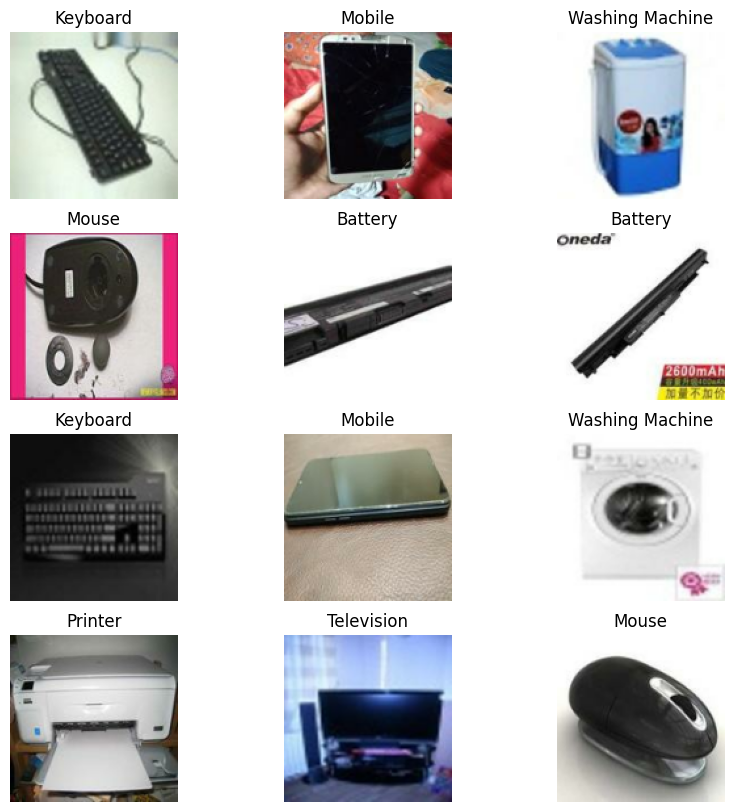

In [18]:
plt.figure(figsize=(10, 10))

for images, labels in datatrain.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

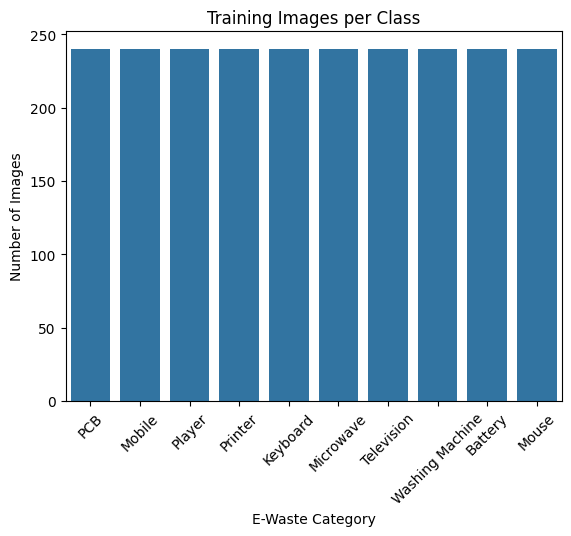

In [8]:
import os

classes = os.listdir(trainpath)
class_counts = {cls: len(os.listdir(os.path.join(trainpath, cls))) for cls in classes}

sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.title("Training Images per Class")
plt.xlabel("E-Waste Category")
plt.ylabel("Number of Images")
plt.show()

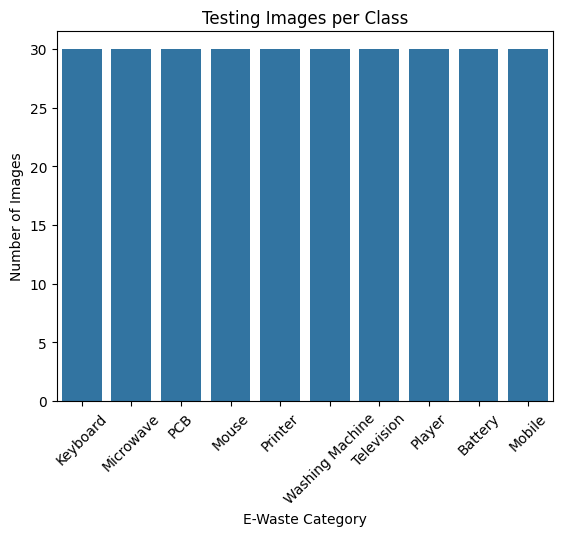

In [13]:
classes = os.listdir(testpath)
class_counts = {cls: len(os.listdir(os.path.join(testpath, cls))) for cls in classes}

sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.title("Testing Images per Class")
plt.xlabel("E-Waste Category")
plt.ylabel("Number of Images")
plt.show()

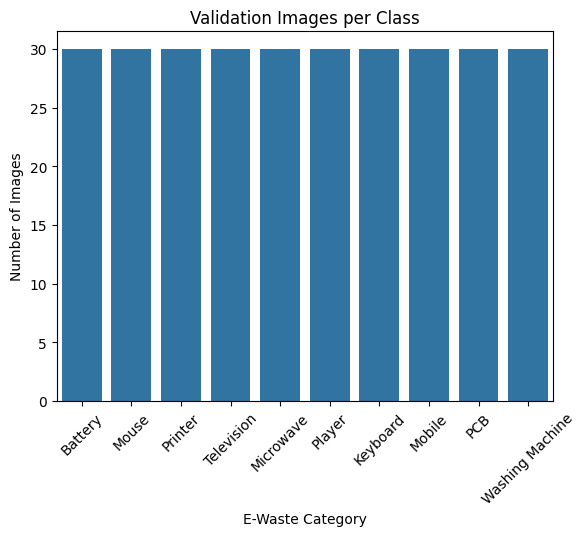

In [15]:
classes = os.listdir(validpath)
class_counts = {cls: len(os.listdir(os.path.join(validpath, cls))) for cls in classes}

sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.title("Validation Images per Class")
plt.xlabel("E-Waste Category")
plt.ylabel("Number of Images")
plt.show()